In [1]:
import pandas as pd

base = pd.read_csv('house_prices.csv')
X = base.iloc[:,5:6].values
y = base.iloc[:,2].values

base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Simple Linear Regression

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=0)

In [3]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

score=regressor.score(X_train, y_train)
score

0.49453356717789787

In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

Text(0.5, 1.0, 'Linear Regression')

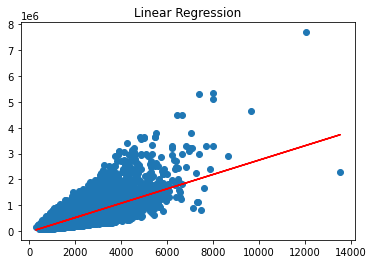

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Linear Regression')

# Multiple Linear Regression

In [5]:
X = base.iloc[:,3:18].values
y = base.iloc[:,2].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

score=regressor.score(X_train, y_train)
score

0.6997951232591053

In [7]:
predict = regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predict)
mae

123986.12403986632

# Polynomial Linear Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train_poly,y_train)
score2 = regressor2.score(X_train_poly,y_train)
print(score2)

0.8436719746520157


In [9]:
predict = regressor2.predict(X_test_poly)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predict)
mae

144120.959680539

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor()
regressor3.fit(X_train,y_train)
score = regressor3.score(X_train,y_train)
score

0.977439109165839

In [17]:
regressor3.score(X_test, y_test)

0.7194566930334991

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor4 = RandomForestRegressor(n_estimators = 10)
regressor4.fit(X_train,y_train)
score = regressor4.score(X_train,y_train)
score

0.96979579734299

In [19]:
regressor4.score(X_test, y_test)

0.8300007365622096

# SVR - Support Vector Regression

In [38]:
X = base.iloc[:,3:18].values
y = base.iloc[:,2:3].values

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=0)

In [39]:
from sklearn.svm import SVR
regressor_rbf = SVR(kernel='rbf')
regressor_rbf.fit(X_train,y_train)
print(regressor_rbf.score(X_train,y_train))
print(regressor_rbf.score(X_test, y_test))

C:\Users\crist\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7926826552542974
0.7168857259136221


In [40]:
predict_rbf = regressor_rbf.predict(X_test)
y_test = scaler_y.inverse_transform(y_test)
predict_rbf = scaler_y.inverse_transform(predict_rbf)

# Neural Networks

In [41]:
X = base.iloc[:,3:18].values
y = base.iloc[:,2:3].values

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=0)

In [45]:
from sklearn.neural_network import MLPRegressor
regressor5 = MLPRegressor(hidden_layer_sizes=(9,9))
regressor5.fit(X_train,y_train)
print(regressor5.score(X_train,y_train))
print(regressor5.score(X_test,y_test))

C:\Users\crist\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.866334977600302
0.8519637635188309


Fazer os testes de Friedmann e Nemenyi